# CSE 351 Summer 2022
## Project 4: What makes people in a country happy?
## Amara Im, Christina Low

## Merge and Clean Data
We first imported relevant Python libraries that will be used throughout the project. Then, we merged the data by having each csv file be put into a dictionary, with the key being the year and the value being the dataframe.
There were some inconsistencies in column names so we addressed that as well. There was one null value so we replaced that value with 0. <br> <br>
One thing to note is that some years had only the "Family" column while others had "Social Support." As both columns are both similar, we combined these columns together as "Family or Social Support." <br> <br>
Years 2015-2017 had the "Dystopia Residual" column while years 2018 and 2019 did not. To preserve this feature, we calculated the dystopia residuals for the latter years by finding the difference between the sum of the other features and the total happiness score.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

# merge all the dataframes into a dictionary
data15 = pd.read_csv('world_happiness/world_happiness/2015.csv')
data16 = pd.read_csv('world_happiness/world_happiness/2016.csv')
data17 = pd.read_csv('world_happiness/world_happiness/2017.csv')
data18 = pd.read_csv('world_happiness/world_happiness/2018.csv')
data19 = pd.read_csv('world_happiness/world_happiness/2019.csv')

allData = {'2015':data15, '2016':data16, '2017':data17, '2018':data18, '2019':data19}

# rename columns for consistency

## Happiness Score
allData['2017'].rename(columns = {'Happiness.Score':'Happiness Score'}, inplace = True)
allData['2018'].rename(columns = {'Score':'Happiness Score'}, inplace = True)
allData['2019'].rename(columns = {'Score':'Happiness Score'}, inplace = True)

## Happiness Rank
allData['2017'].rename(columns = {'Happiness.Rank':'Happiness Rank'}, inplace = True)
allData['2018'].rename(columns = {'Overall rank':'Happiness Rank'}, inplace = True)
allData['2019'].rename(columns = {'Overall rank':'Happiness Rank'}, inplace = True)

## Country
allData['2018'].rename(columns = {'Country or region':'Country'}, inplace = True)
allData['2019'].rename(columns = {'Country or region':'Country'}, inplace = True)

## Economy (GDP per Capita)
allData['2017'].rename(columns = {'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'}, inplace = True)
allData['2018'].rename(columns = {'GDP per capita':'Economy (GDP per Capita)'}, inplace = True)
allData['2019'].rename(columns = {'GDP per capita':'Economy (GDP per Capita)'}, inplace = True)

## Health (Life Expectancy)
allData['2017'].rename(columns = {'Health..Life.Expectancy.':'Health (Life Expectancy)'}, inplace = True)
allData['2018'].rename(columns = {'Healthy life expectancy':'Health (Life Expectancy)'}, inplace = True)
allData['2019'].rename(columns = {'Healthy life expectancy':'Health (Life Expectancy)'}, inplace = True)

## Trust (Government Corruption)
allData['2017'].rename(columns = {'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace = True)
allData['2018'].rename(columns = {'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
allData['2019'].rename(columns = {'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

## Freedom
allData['2018'].rename(columns = {'Freedom to make life choices':'Freedom'}, inplace = True)
allData['2019'].rename(columns = {'Freedom to make life choices':'Freedom'}, inplace = True)

## Combining 'Family' and 'Social Support'
allData['2015'].rename(columns = {'Family':'Family or Social Support'}, inplace = True)
allData['2016'].rename(columns = {'Family':'Family or Social Support'}, inplace = True)
allData['2017'].rename(columns = {'Family':'Family or Social Support'}, inplace = True)
allData['2018'].rename(columns = {'Social support':'Family or Social Support'}, inplace = True)
allData['2019'].rename(columns = {'Social support':'Family or Social Support'}, inplace = True)

## Note that 2018 - 2019 do not have the 'Dystopia Residual' column.
## Dystopia Residual
allData['2017'].rename(columns = {'Dystopia.Residual':'Dystopia Residual'}, inplace = True)
temp_years = ['2018', '2019']
for year in temp_years:
    ds = []
    for index, row in allData[year].iterrows():
        ds.append(round(row['Happiness Score'] - (row['Generosity'] + row['Health (Life Expectancy)'] + row['Freedom'] + row['Economy (GDP per Capita)'] + row['Trust (Government Corruption)'] + row['Family or Social Support']), 3))
    allData[year]['Dystopia Residual'] = ds

## Check for any NaN values in all the datasets 
## Replace with 0s
for year in allData.keys():
    for col in allData[year].columns:
        allData[year][col] = allData[year][col].replace(np.nan, 0)

data15.to_csv(r'C:\Users\chris\CSE351_Project\data15.csv')
data16.to_csv(r'C:\Users\chris\CSE351_Project\data16.csv')
data17.to_csv(r'C:\Users\chris\CSE351_Project\data17.csv')
data18.to_csv(r'C:\Users\chris\CSE351_Project\data18.csv')
data19.to_csv(r'C:\Users\chris\CSE351_Project\data19.csv')

In [ ]:
# Check if data types are consistent throughout all years -- Looks good!
print(data15.dtypes)
print("-------------")
print(data16.dtypes)
print("-------------")
print(data17.dtypes)
print("-------------")
print(data18.dtypes)
print("-------------")
print(data19.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family or Social Support         float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
-------------
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family or Social Support         float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                   

In [4]:
# check how the updated data looks now!
print('2015')
allData['2015'].head()

2015


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
print('2016')
allData['2016'].head()

2016


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
print('2017')
allData['2017'].head()

2017


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
print('2018')
allData['2018'].head()

2018


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318


In [8]:
print('2019')
allData['2019'].head()

2019


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


## EDA

### What are the central tendencies of happiness score over the years? Did they increase or decrease? 
The central tendencies we will be examining for the happiness score over the years is Median and Mean. We will then plot these values and examine which is more useful to look at in terms of our dataset.


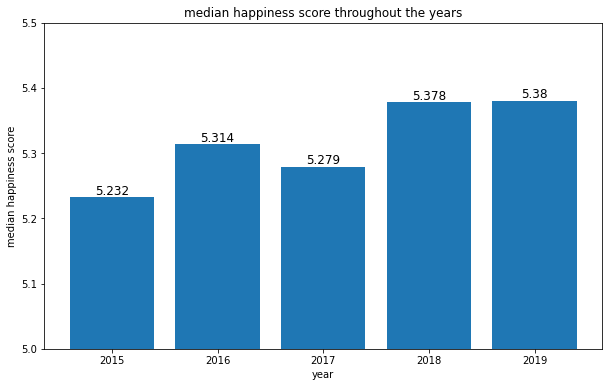

In [ ]:
## Dictionary for Median Happiness Scores by year
median_happiness_score = {}

for year in allData.keys():
    df = allData[year]
    # calculate median score for each year
    median_happiness_score[year] = round(df['Happiness Score'].median(), 3)

# plot bar graph by year and score
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(list(median_happiness_score.keys()), list(median_happiness_score.values()))
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), f'{bar.get_height():,}', ha='center', va='bottom', color='black',size=12)

plt.ylim(5.0, 5.5)
plt.xlabel('year')
plt.ylabel('median happiness score')
plt.title('median happiness score throughout the years')
plt.show()

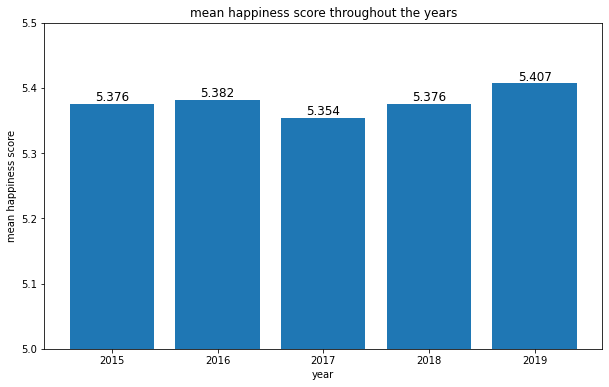

In [ ]:
## Dictionary for Mean Happiness Scores by year
mean_happiness_score = {}

for year in allData.keys():
    df = allData[year]
    # calculate median score for each year
    mean_happiness_score[year] = round(df['Happiness Score'].mean(), 3)

# plot bar graph by year and score
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(list(median_happiness_score.keys()), list(mean_happiness_score.values()))
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), f'{bar.get_height():,}', ha='center', va='bottom', color='black',size=12)

plt.ylim(5.0, 5.5)
plt.xlabel('year')
plt.ylabel('mean happiness score')
plt.title('mean happiness score throughout the years')
plt.show()

In [ ]:
## Descriptive stats of Happiness Score for each year

for year in allData.keys():
    df = allData[year]
    print(year)
    print(df['Happiness Score'].describe())
    print('----------')

2015
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
----------
2016
count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64
----------
2017
count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness Score, dtype: float64
----------
2018
count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness Score, dtype: float64
----------
2019
count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500

Explanation: The mean of the Happiness Score throughout the years are consistently greater than the median, therefore, we can tell that the data is skewed to the right. <br>

We can take a look at the median values for a more accurate representation of the sample set. The median values are: <br>

```
{'2015': 5.233, '2016': 5.314, '2017': 5.279, '2018': 5.378, '2019': 5.380}

```
For the majority of the time (except for 2016 to 2017), there is a slight increase in Happiness Score from the previous year to the next.

### Which countries have stable rankings over the years? Which countries improved their rankings? 
To test stability in countries' rankings over the years, we will take a look at each country's rank for all years and find the Standard deviation.

In [ ]:
newData = allData

# renaming countries for consistency
for year in newData.keys():
    newData[year]["Country"] = newData[year]["Country"].replace(['Somaliland region'],'Somaliland Region')
    newData[year]["Country"] = newData[year]["Country"].replace(['North Cyprus'],'Northern Cyprus')
    newData[year]["Country"] = newData[year]["Country"].replace(['Hong Kong S.A.R., China'],'Hong Kong')
    newData[year]["Country"] = newData[year]["Country"].replace(['Taiwan Province of China'],'Taiwan')
    newData[year]["Country"] = newData[year]["Country"].replace(['Trinidad & Tobago'],'Trinidad and Tobago')

# remove countries that are not present in all the years
def remove_country(myList, df):
    for c in myList:
        df = df[df["Country"] != c]
    return df

def find_missing_vals(list1, list2):
    return list(set(list1).difference(list2))

for i in newData.keys():
    for j in newData.keys():
        missing_vals = find_missing_vals(newData[i]["Country"], newData[j]["Country"])
        newData[i] = remove_country(missing_vals, newData[i])
        additional_vals = find_missing_vals(newData[j]["Country"], newData[i]["Country"])
        newData[j] = remove_country(additional_vals, newData[j])

# make a new dataframe to store all the ranks throughout the years for each country
countries = newData['2019']['Country'].tolist()
countries.sort()
years = np.array([2015, 2016, 2017, 2018, 2019])
data = []
for c in countries:
    country_ranks = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Happiness Rank'].item()
        country_ranks.append(item)
    y = np.array(country_ranks)

    std = round(statistics.pstdev(country_ranks), 2)
    country_ranks.append(std)

    m, b = np.polyfit(years, y, 1)
    country_ranks.append(round(m, 2))
    country_ranks.insert(0, c)
    data.append(country_ranks)

ranks_by_year = pd.DataFrame(data, columns=['Country', '2015', '2016', '2017', '2018', '2019', 'StDev', 'Slope'])

In [ ]:
most_stable = ranks_by_year.sort_values(by=['StDev'])
print(most_stable.head(25))

                 Country  2015  2016  2017  2018  2019  StDev  Slope
92           New Zealand     9     8     8     8     8   0.40   -0.2
5              Australia    10     9    10    10    11   0.63    0.3
91           Netherlands     7     7     6     6     5   0.75   -0.5
34               Denmark     3     1     2     3     2   0.75   -0.0
54               Iceland     2     3     3     4     4   0.75    0.5
30            Costa Rica    12    14    12    13    12   0.80   -0.1
11               Belgium    19    18    17    16    18   1.02   -0.4
121               Sweden     8    10     9     9     7   1.02   -0.3
109               Rwanda   154   152   151   151   152   1.10   -0.5
6                Austria    13    12    13    12    10   1.10   -0.6
97                Norway     4     4     1     2     3   1.17   -0.4
23                Canada     5     6     7     7     9   1.33    0.9
138              Uruguay    32    29    28    31    33   1.85    0.4
122          Switzerland     1    

Explanation: We've created a new feature ("StDev") which calculates the standard deviation of the rankings for each country. <br>

The country with the lowest standard deviation means that its rankings don't fluctuate much and thus, is the most stable. <br>

The top 5 most stable countries are: New Zealand, Australia, Denmark, Iceland, Netherlands

In [ ]:
most_improved = ranks_by_year.sort_values(by=['Slope'])
print(most_improved.head(25))

                 Country  2015  2016  2017  2018  2019  StDev  Slope
62           Ivory Coast   151   139   128   107    99  19.39  -13.6
51              Honduras   105   104    91    72    59  18.08  -12.4
12                 Benin   155   153   143   136   102  19.18  -12.3
43                 Gabon   143   134   118   103   104  15.96  -10.9
53               Hungary   104    91    75    69    62  15.28  -10.6
18              Bulgaria   134   129   105   100    97  15.40  -10.3
19          Burkina Faso   152   145   134   121   115  13.95   -9.8
107              Romania    86    71    57    52    48  13.96   -9.5
21              Cambodia   145   140   129   120   109  13.09   -9.2
22              Cameroon   133   114   107    99    96  13.20   -8.9
71                Latvia    89    68    54    53    53  14.01   -8.7
28   Congo (Brazzaville)   139   127   124   114   103  12.18   -8.5
111              Senegal   142   128   115   109   111  12.41   -8.1
125           Tajikistan   106   1

Explanation: Another feature created was ("Slope") which was calcuated by finding the best fit line through the ranks and returning the slope. <br>

The negative and positive signs indicate the direction of the line. In this case, we are only concerned about the negative direction because we're looking for the decrease in rankings. <br>

The top 5 most improved countries are: Ivory Coast, Honduras, Benin, Gabon, Hungary

### Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc. 
Here we will be visualizing Pearson Correlations by year. We looked at the correlations between 8 different features, including the Happiness Score. <br>
The columns specificially are: 'Happiness Score', 'Economy (GDP per Capita)','Family or Social Support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual'. <br>
The Pearson correlation measures the strength of the linear relationship between two variables

In [ ]:
# 2015
# isolate columns
haprel15 = data15[['Happiness Score', 'Economy (GDP per Capita)',
                   'Family or Social Support', 'Health (Life Expectancy)', 
                   'Freedom', 'Trust (Government Corruption)', 
                   'Generosity','Dystopia Residual']]

# do pearson corr on the new dataframe
pearsoncorr = haprel15.corr(method='pearson')
pearsoncorr

,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family or Social Support,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


[Text(0.5, 1.0, '2015: Relationship Between Happiness Score and Factors')]

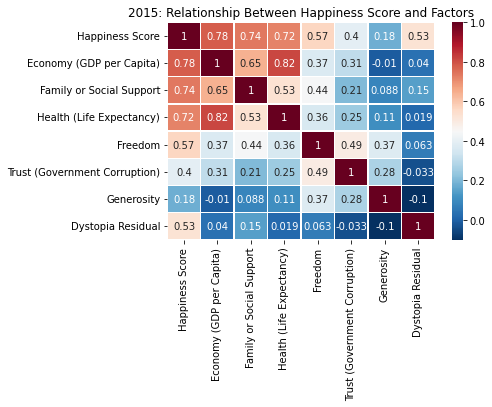

In [ ]:
#create heatmap with seaborn
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5).set(title = '2015: Relationship Between Happiness Score and Factors')

In [ ]:
# 2016
# isolate columns
haprel16 = data16[['Happiness Score', 'Economy (GDP per Capita)','Family or Social Support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']]

#do pearson corr on the new dataframe
pearsoncorr = haprel16.corr(method='pearson')
pearsoncorr


,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Economy (GDP per Capita),0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family or Social Support,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,0.543738,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


[Text(0.5, 1.0, '2016: Relationship Between Happiness Score and Factors')]

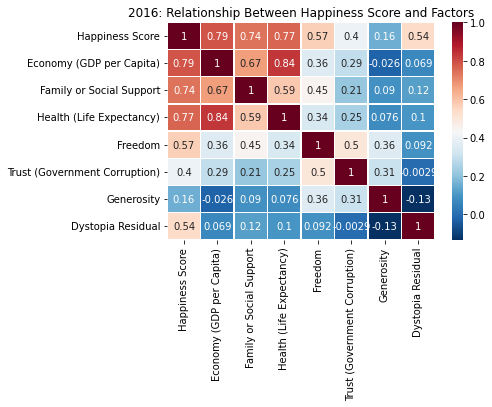

In [ ]:
#create heatmap with seaborn
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5).set(title = '2016: Relationship Between Happiness Score and Factors')

In [ ]:
# 2017
# isolate columns
haprel17 = data17[['Happiness Score', 'Economy (GDP per Capita)','Family or Social Support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']]

#do pearson corr on the new dataframe
pearsoncorr = haprel17.corr(method='pearson')
pearsoncorr


,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.429080,0.155256,0.475355
Economy (GDP per Capita),0.812469,1.000000,0.688296,0.843077,0.369873,0.350944,-0.019011,0.024226
Family or Social Support,0.752737,0.688296,1.000000,0.612080,0.424966,0.231841,0.051693,0.070506
Health (Life Expectancy),0.781951,0.843077,0.612080,1.000000,0.349827,0.279752,0.063191,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.499183,0.316083,0.081926
Trust (Government Corruption),0.429080,0.350944,0.231841,0.279752,0.499183,1.000000,0.294159,-0.022755
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,0.294159,1.000000,-0.116627
Dystopia Residual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.022755,-0.116627,1.000000


[Text(0.5, 1.0, '2017: Relationship Between Happiness Score and Factors')]

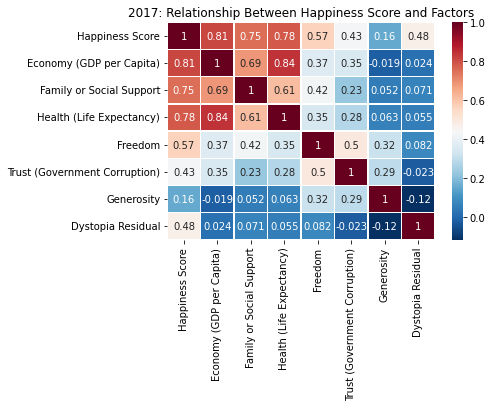

In [ ]:
#create heatmap with seaborn
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5).set(title = '2017: Relationship Between Happiness Score and Factors')

In [ ]:
# 2018
# isolate columns
haprel18 = data18[['Happiness Score', 'Economy (GDP per Capita)','Family or Social Support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

#do pearson corr on the new dataframe
pearsoncorr = haprel18.corr(method='pearson')
pearsoncorr

,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.802124,0.745760,0.775814,0.544280,0.392151,0.135825,0.419756
Economy (GDP per Capita),0.802124,1.000000,0.672080,0.844273,0.332275,0.285298,-0.011241,-0.076955
Family or Social Support,0.745760,0.672080,1.000000,0.667288,0.411087,0.226757,0.018226,0.072920
Health (Life Expectancy),0.775814,0.844273,0.667288,1.000000,0.355475,0.311923,0.020751,-0.012742
Freedom,0.544280,0.332275,0.411087,0.355475,1.000000,0.466651,0.297988,0.090501
Trust (Government Corruption),0.392151,0.285298,0.226757,0.311923,0.466651,1.000000,0.360302,-0.011036
Generosity,0.135825,-0.011241,0.018226,0.020751,0.297988,0.360302,1.000000,-0.068391
Dystopia Residual,0.419756,-0.076955,0.072920,-0.012742,0.090501,-0.011036,-0.068391,1.000000


[Text(0.5, 1.0, '2018: Relationship Between Happiness Score and Factors')]

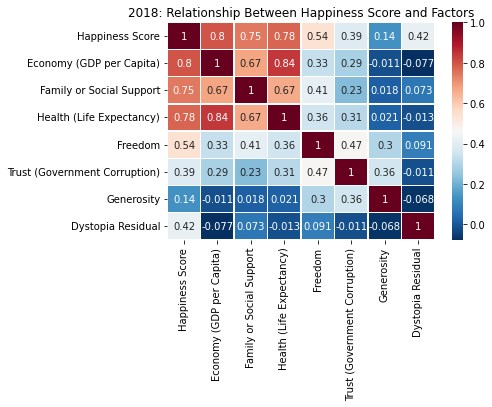

In [ ]:
#create heatmap with seaborn
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5).set(title = '2018: Relationship Between Happiness Score and Factors')

In [ ]:
# 2019
# isolate columns
haprel19 = data19[['Happiness Score', 'Economy (GDP per Capita)','Family or Social Support', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']]

#do pearson corr on the new dataframe
pearsoncorr = haprel19.corr(method='pearson')
pearsoncorr

,Happiness Score,Economy (GDP per Capita),Family or Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.385613,0.075824,0.473930
Economy (GDP per Capita),0.793883,1.000000,0.754906,0.835462,0.379079,0.298920,-0.079662,-0.033730
Family or Social Support,0.777058,0.754906,1.000000,0.719009,0.447333,0.181899,-0.048126,0.026890
Health (Life Expectancy),0.779883,0.835462,0.719009,1.000000,0.390395,0.295283,-0.029511,-0.005720
Freedom,0.566742,0.379079,0.447333,0.390395,1.000000,0.438843,0.269742,0.077521
Trust (Government Corruption),0.385613,0.298920,0.181899,0.295283,0.438843,1.000000,0.326538,-0.008120
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,0.326538,1.000000,-0.051231
Dystopia Residual,0.473930,-0.033730,0.026890,-0.005720,0.077521,-0.008120,-0.051231,1.000000


[Text(0.5, 1.0, '2019: Relationship Between Happiness Score and Factors')]

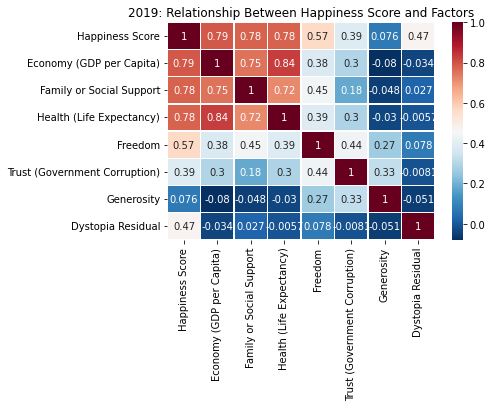

In [ ]:
#create heatmap with seaborn
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5).set(title = '2019: Relationship Between Happiness Score and Factors')

Explanation:
Using our Pearson Correlation heatmap, we can determine which features are most strongly correlated with a higher happiness score. <br>
In 2015, Economy (0.78), Family/Social Support (0.74), and Health (0.72)were the most correlated with having a greater happiness score.<br>

In 2016, Economy (0.79), Health (0.77), and Family/Social Support (0.74) were the most correlated with having a greater happiness score.<br>

In 2017, Economy (0.81), Health (0.78), and Family/Social Support (0.75) were the most correlated with having a greater happiness score.<br>

In 2018, Economy (0.8), Health (0.78), and Family/Social Support (0.75) were the most correlated with having a greater happiness score.<br>

In 2019, Economy (0.79), Health (0.78), and Family/Social Support (0.78) were the most correlated with having a greater happiness score.<br>

Looking at these features, it is interesting to see how these three features consistently have a strong positive correlation with the Happiness Score, while features like Generousity and Trust (Government Corruption) were factors that had the lowest correlation. Although correlation does not mean causation, this is still important to note.

### Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier? 

Using the dataset of most improved countries, we're trying to find what features increase or decrease that could help us understand why these countries' rankings decreases

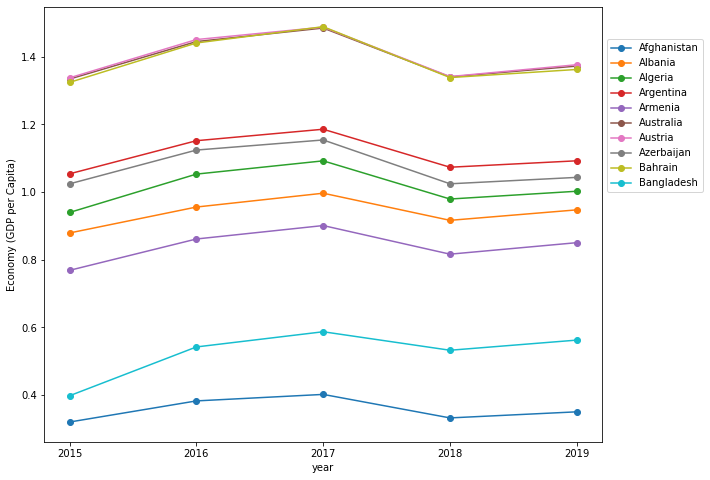


-------------
Rate of Change for Economy (GDP per Capita)
Afghanistan: 0.0
Albania: 0.01
Algeria: 0.01
Argentina: -0.0
Armenia: 0.01
Australia: -0.0
Austria: -0.0
Azerbaijan: -0.01
Bahrain: -0.0
Bangladesh: 0.03
Average Rate of Change = 0.005


In [ ]:
years = [2015, 2016, 2017, 2018, 2019]
new_most_improved = ranks_by_year.head(10)
ax.set_ylim(40, 160)

# Economy
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_economy = {}

for c in new_most_improved['Country']:
    economy = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Economy (GDP per Capita)'].item()
        economy.append(item)
    plt.plot(years, economy, linestyle="-", marker="o", label=c)

    y = np.array(economy)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_economy[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

print("\n-------------\nRate of Change for Economy (GDP per Capita)")
for k in slope_economy.keys():
    print(k + ": " + str(slope_economy[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_economy.values()))))

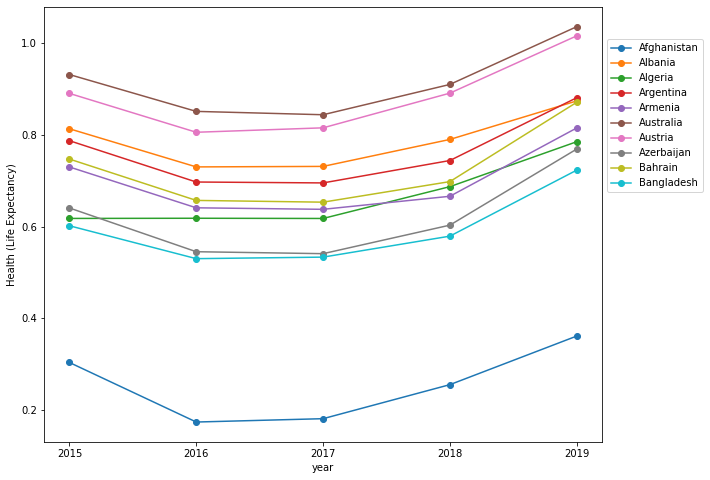


-------------
Rate of Change for Health (Life Expectancy)
Afghanistan: 0.02
Albania: 0.02
Algeria: 0.04
Argentina: 0.02
Armenia: 0.02
Australia: 0.03
Austria: 0.03
Azerbaijan: 0.03
Bahrain: 0.03
Bangladesh: 0.03
Average Rate of Change = 0.027


In [ ]:
# Health
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_health = {}

for c in new_most_improved['Country']:
    health = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Health (Life Expectancy)'].item()
        health.append(item)
    plt.plot(years, health, linestyle="-", marker="o", label=c)

    y = np.array(health)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_health[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Health (Life Expectancy)')
plt.show()

print("\n-------------\nRate of Change for Health (Life Expectancy)")
for k in slope_health.keys():
    print(k + ": " + str(slope_health[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_health.values()))))

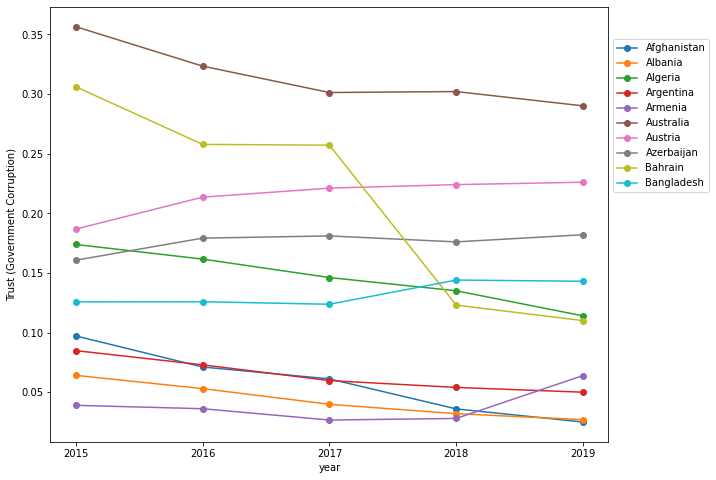


-------------
Rate of Change for Trust (Government Corruption)
Afghanistan: -0.02
Albania: -0.01
Algeria: -0.01
Argentina: -0.01
Armenia: 0.0
Australia: -0.02
Austria: 0.01
Azerbaijan: 0.0
Bahrain: -0.05
Bangladesh: 0.01
Average Rate of Change = -0.01


In [ ]:
# Trust
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_trust = {}

for c in new_most_improved['Country']:
    trust = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Trust (Government Corruption)'].item()
        trust.append(item)
    plt.plot(years, trust, linestyle="-", marker="o", label=c)

    y = np.array(trust)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_trust[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Trust (Government Corruption)')
plt.show()

print("\n-------------\nRate of Change for Trust (Government Corruption)")
for k in slope_trust.keys():
    print(k + ": " + str(slope_trust[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_trust.values()))))

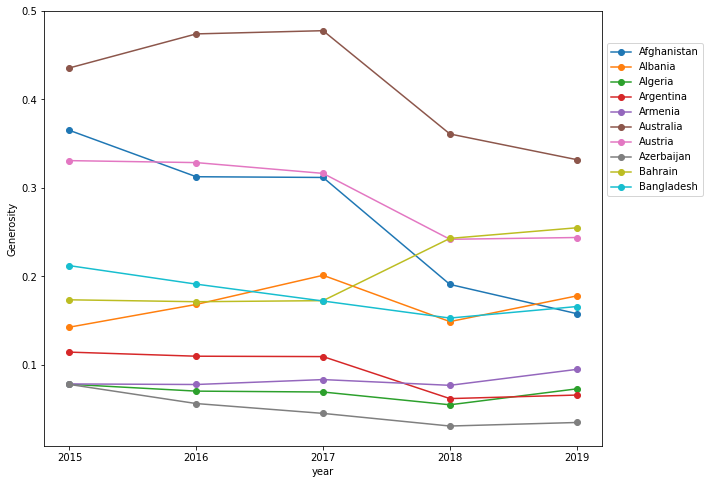


-------------
Rate of Change for Generosity
Afghanistan: -0.05
Albania: 0.01
Algeria: -0.0
Argentina: -0.01
Armenia: 0.0
Australia: -0.03
Austria: -0.03
Azerbaijan: -0.01
Bahrain: 0.02
Bangladesh: -0.01
Average Rate of Change = -0.011


In [ ]:
# Generosity
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_generosity = {}

for c in new_most_improved['Country']:
    generosity = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Generosity'].item()
        generosity.append(item)
    plt.plot(years, generosity, linestyle="-", marker="o", label=c)

    y = np.array(generosity)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_generosity[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Generosity')
plt.show()

print("\n-------------\nRate of Change for Generosity")
for k in slope_generosity.keys():
    print(k + ": " + str(slope_generosity[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_generosity.values()))))

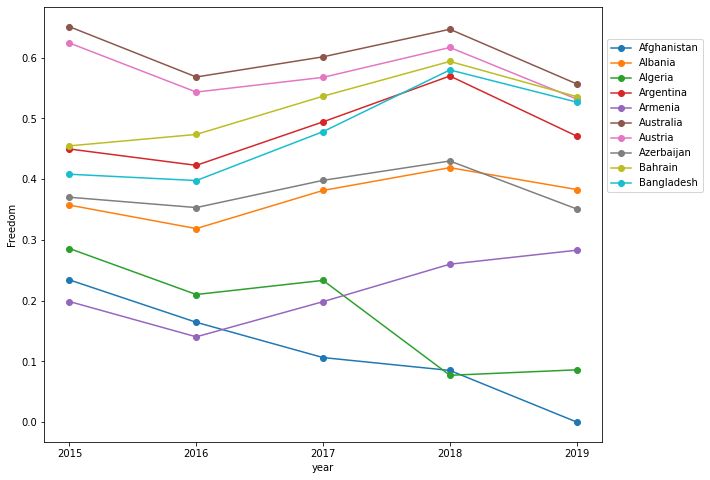


-------------
Rate of Change for Freedom
Afghanistan: -0.05
Albania: 0.02
Algeria: -0.05
Argentina: 0.02
Armenia: 0.03
Australia: -0.01
Austria: -0.01
Azerbaijan: 0.0
Bahrain: 0.03
Bangladesh: 0.04
Average Rate of Change = 0.001999999999999999


In [ ]:
# Freedom
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_freedom = {}

for c in new_most_improved['Country']:
    freedom = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Freedom'].item()
        freedom.append(item)
    plt.plot(years, freedom, linestyle="-", marker="o", label=c)

    y = np.array(freedom)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_freedom[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Freedom')
plt.show()

print("\n-------------\nRate of Change for Freedom")
for k in slope_freedom.keys():
    print(k + ": " + str(slope_freedom[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_freedom.values()))))

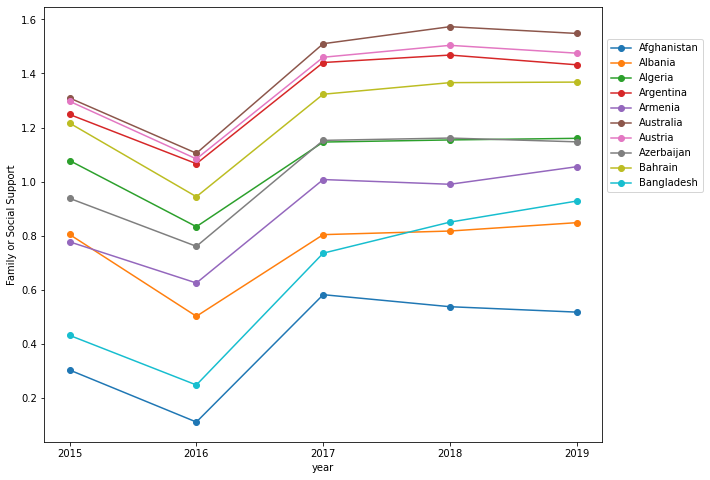


-------------
Rate of Change for Family or Social Support
Afghanistan: 0.09
Albania: 0.04
Algeria: 0.05
Argentina: 0.08
Armenia: 0.09
Australia: 0.09
Austria: 0.08
Azerbaijan: 0.08
Bahrain: 0.07
Bangladesh: 0.16
Average Rate of Change = 0.083


In [ ]:
# Family or Social Support
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_support = {}

for c in new_most_improved['Country']:
    support = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Family or Social Support'].item()
        support.append(item)
    plt.plot(years, support, linestyle="-", marker="o", label=c)

    y = np.array(support)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_support[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Family or Social Support')
plt.show()

print("\n-------------\nRate of Change for Family or Social Support")
for k in slope_support.keys():
    print(k + ": " + str(slope_support[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_support.values()))))

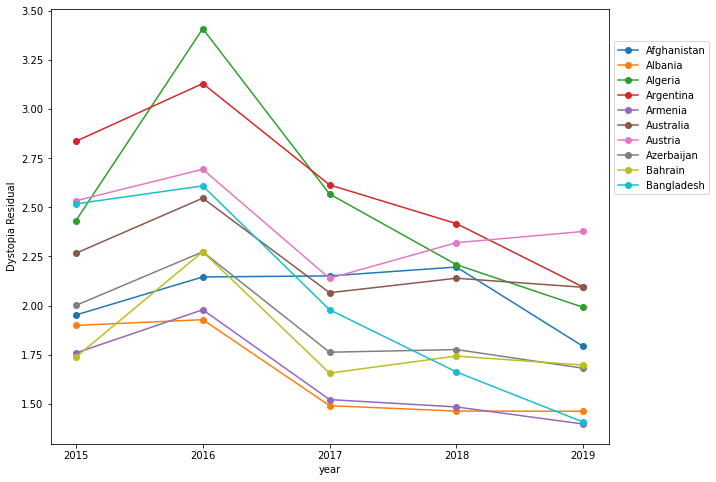


-------------
Rate of Change for Dystopia Residual
Afghanistan: -0.03
Albania: -0.13
Algeria: -0.21
Argentina: -0.22
Armenia: -0.12
Australia: -0.08
Austria: -0.07
Azerbaijan: -0.11
Bahrain: -0.06
Bangladesh: -0.32
Average Rate of Change = -0.135


In [ ]:
# Dystopia Residual
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(1))
slope_dystopia = {}

for c in new_most_improved['Country']:
    dystopia = []
    for year in newData.keys(): 
        item = newData[year].loc[newData[year]['Country'] == c, 'Dystopia Residual'].item()
        dystopia.append(item)
    plt.plot(years, dystopia, linestyle="-", marker="o", label=c)

    y = np.array(dystopia)
    m, b = np.polyfit(np.array(years), y, 1)
    slope_dystopia[c] = round(m, 2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.xlabel('year')
plt.ylabel('Dystopia Residual')
plt.show()

print("\n-------------\nRate of Change for Dystopia Residual")
for k in slope_dystopia.keys():
    print(k + ": " + str(slope_dystopia[k]))
print("Average Rate of Change = " + str(statistics.mean(list(slope_dystopia.values()))))

If we were president, we would focus on the economy and the health sector of the country because these features are positively impacted and can be improved by the goverment.

Economy: 0.013 <br>
Health: 0.021 <br>
Trust: -0.005 <br>
Generosity: -0.014 <br>
Freedom: -0.001 <br>
Support: 0.09 <br>
Dystopia: 0.162 <br>

However, we have to remember to correlation does not equal causation. Although the happiness ranking improved, trust in the government decreased. 

## Modeling

### Preparing Data

In [ ]:
# 2015 - 2018 training sets
economy_row = np.array([])
support_row = np.array([])
health_row = np.array([])
freedom_row = np.array([])
generosity_row = np.array([])
trust_row = np.array([])
dystopia_row = np.array([])

happiness_score = np.array([])
training_years = ['2015', '2016', '2017', '2018']

for year in training_years:
    economy_row = np.append(economy_row, allData[year]['Economy (GDP per Capita)'])
    support_row = np.append(support_row, allData[year]['Family or Social Support'])
    health_row = np.append(health_row, allData[year]['Health (Life Expectancy)'])
    freedom_row = np.append(freedom_row, allData[year]['Freedom'])
    generosity_row = np.append(generosity_row, allData[year]['Generosity'])
    trust_row = np.append(trust_row, allData[year]['Trust (Government Corruption)'])
    dystopia_row = np.append(dystopia_row, allData[year]['Dystopia Residual'])

# complied all the feature values into a matrix
feature_matrix = np.vstack((economy_row, support_row, health_row, freedom_row, generosity_row, trust_row, dystopia_row)).T

# calculate the happiness score by adding all the feature values from
## economy + health + support + freedom + trust + generosity + dystopia
for idx in range(len(economy_row)):
    happiness_score = np.append(happiness_score, round(dystopia_row[idx] + economy_row[idx] + support_row[idx] + health_row[idx] 
                                                       + freedom_row[idx] + generosity_row[idx] + trust_row[idx], 3))

# 2019 test set
economy_row_2019 = np.array(allData['2019']['Economy (GDP per Capita)'])
support_row_2019 = np.array(allData['2019']['Family or Social Support'])
health_row_2019 = np.array(allData['2019']['Health (Life Expectancy)'])
freedom_row_2019 = np.array(allData['2019']['Freedom'])
generosity_row_2019 = np.array(allData['2019']['Generosity'])
trust_row_2019 = np.array(allData['2019']['Trust (Government Corruption)'])
dystopia_row_2019 = np.array(allData['2019']['Dystopia Residual'])
happiness_score_2019 = np.array(allData['2019']['Happiness Score'])

# expected happiness score
feature_matrix_2019 = np.vstack((economy_row_2019, support_row_2019, health_row_2019, freedom_row_2019, generosity_row_2019, trust_row_2019, dystopia_row_2019)).T

### Linear Regression Model

This model finds the linear relationship between x (input) and y (output). It predicts the dependent variable (y) based on the independent variable (x)

In [ ]:
# fit model to training data
linreg = LinearRegression().fit(feature_matrix, happiness_score)
# make predictions for test data
linreg_predict_score = linreg.predict(feature_matrix_2019)

predicted_rank = pd.DataFrame(allData['2019']['Country'], columns=['Country'])
predicted_rank['Happiness Score'] = linreg_predict_score
predicted_rank = predicted_rank.sort_values(by=['Happiness Score'], ascending=False)
predicted_rank['Happiness Rank'] = range(1, predicted_rank.shape[0] + 1)

print("Predicted Ranking\n-------------")
print(predicted_rank.head(20))

Predicted Ranking
-------------
           Country  Happiness Score  Happiness Rank
0          Finland         7.768920               1
1          Denmark         7.599938               2
2           Norway         7.553951               3
3          Iceland         7.493980               4
4      Netherlands         7.487962               5
5      Switzerland         7.479946               6
6           Sweden         7.342946               7
7      New Zealand         7.306947               8
8           Canada         7.277950               9
9          Austria         7.245957              10
10       Australia         7.227961              11
11      Costa Rica         7.166939              12
12          Israel         7.138970              13
13      Luxembourg         7.089960              14
14  United Kingdom         7.053971              15
15         Ireland         7.020971              16
16         Germany         6.984963              17
17         Belgium         6.922

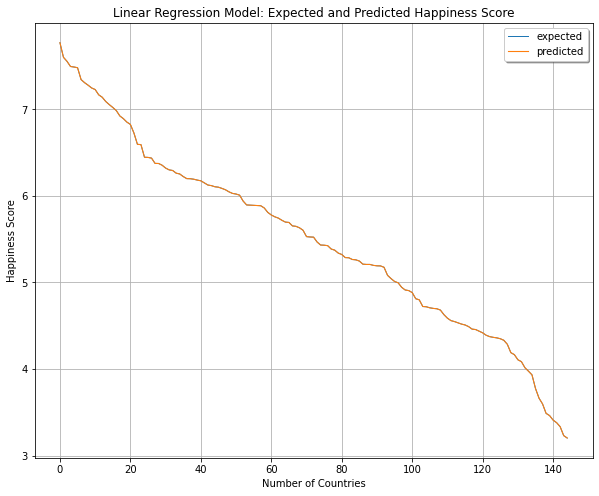

In [ ]:
x_ax = range(len(happiness_score_2019))
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x_ax, happiness_score_2019, linewidth=1, label="expected")
plt.plot(x_ax, linreg_predict_score, linewidth=1.1, label="predicted")
plt.title("Linear Regression Model: Expected and Predicted Happiness Score")
plt.xlabel('Number of Countries')
plt.ylabel('Happiness Score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
# MAE (Mean Absolute Error)
linreg_mae = round(np.mean(happiness_score_2019 - linreg_predict_score), 10) 
print("Mean Absolute Error for Linear Regression: " + str(linreg_mae))

# MSE (Mean Squared Error)
linreg_mse = mean_squared_error(happiness_score_2019, linreg_predict_score)
print("Mean Squared Error for Linear Regression: " + str(linreg_mse))

# RMSE (Root Mean Squared Error)
linreg_rmse = mean_squared_error(happiness_score_2019, linreg_predict_score, squared=False)
print("Root Mean Squared Error for Linear Regression: " + str(linreg_rmse))

Mean Absolute Error for Linear Regression: 1.36896e-05
Mean Squared Error for Linear Regression: 9.167496275084059e-10
Root Mean Squared Error for Linear Regression: 3.0277873563188117e-05


The Linear Regression has the lowest error values out of all the models. <br>
Based on the line graph, the predicted rankings were all in-line with the actual rankings.


### Random Forest Model

This model creates a set of decision trees from a few randomly selected subsets of the training set and picks predictions from each tree.

In [ ]:
# fit model to training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(feature_matrix,happiness_score)
# make predictions for test data
rf_predict_score = rf.predict(feature_matrix_2019)

predicted_rank = pd.DataFrame(allData['2019']['Country'], columns=['Country'])
predicted_rank['Happiness Score'] = rf_predict_score
predicted_rank = predicted_rank.sort_values(by=['Happiness Score'], ascending=False)
predicted_rank['Happiness Rank'] = range(1, predicted_rank.shape[0] + 1)

print("Predicted Ranking\n-------------")
print(predicted_rank.head(20))

Predicted Ranking
-------------
                 Country  Happiness Score  Happiness Rank
1                Denmark          7.39833               1
3                Iceland          7.33751               2
5            Switzerland          7.28713               3
0                Finland          7.23569               4
4            Netherlands          7.20976               5
2                 Norway          7.17557               6
7            New Zealand          7.17426               7
8                 Canada          7.16162               8
6                 Sweden          7.14270               9
10             Australia          6.98927              10
11            Costa Rica          6.88464              11
20  United Arab Emirates          6.84257              12
12                Israel          6.79548              13
9                Austria          6.67896              14
19        Czech Republic          6.67531              15
14        United Kingdom          6.6185

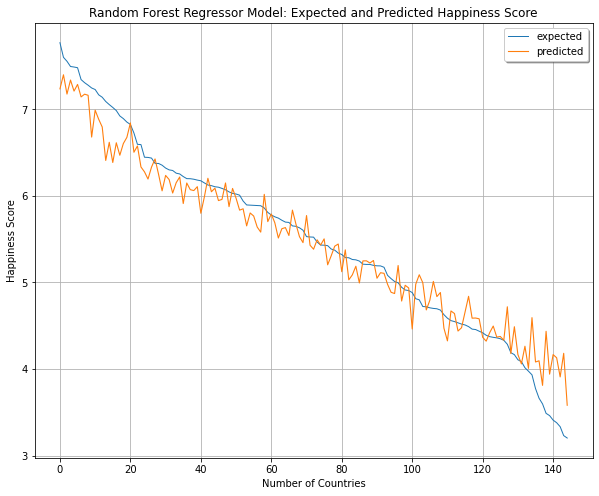

In [ ]:
x_ax = range(len(happiness_score_2019))
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x_ax, happiness_score_2019, linewidth=1, label="expected")
plt.plot(x_ax, rf_predict_score, linewidth=1.1, label="predicted")
plt.title("Random Forest Regressor Model: Expected and Predicted Happiness Score")
plt.xlabel('Number of Countries')
plt.ylabel('Happiness Score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
# MAE (Mean Average Error)
forest_mae = np.mean(happiness_score_2019 - rf_predict_score) 
print("Mean Average Error for Random Forest: " + str(forest_mae))

# MSE (Mean Squared Error)
forest_mse = mean_squared_error(happiness_score_2019, rf_predict_score)
print("Mean Squared Error for Random Forest: " + str(forest_mse))

# RMSE (Root Mean Squared Error)
forest_rmse = mean_squared_error(happiness_score_2019, rf_predict_score, squared=False)
print("Root Mean Squared Error for Random Forest: " + str(forest_rmse))

Mean Average Error for Random Forest: 0.029371999999999805
Mean Squared Error for Random Forest: 0.07065728609793095
Root Mean Squared Error for Random Forest: 0.26581438278981623


Random Forest performs the second best after Linear Regression.

### XGBoost Model

This model minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions).

In [ ]:
# fit model to training data
xgb_model = XGBClassifier().fit(feature_matrix, happiness_score)
# make predictions for test data
xgb_predict_score = xgb_model.predict(feature_matrix_2019)

In [ ]:
predicted_rank = pd.DataFrame(allData['2019']['Country'], columns=['Country'])
predicted_rank['Happiness Score'] = xgb_predict_score
predicted_rank = predicted_rank.sort_values(by=['Happiness Score'], ascending=False)
predicted_rank['Happiness Rank'] = range(1, predicted_rank.shape[0] + 1)

print("Predicted Ranking\n-------------")
print(predicted_rank.head(20))

Predicted Ranking
-------------
               Country  Happiness Score  Happiness Rank
0              Finland            7.314               1
8               Canada            7.314               2
33           Singapore            7.314               3
1              Denmark            7.314               4
10           Australia            7.314               5
42            Colombia            7.072               6
16             Germany            6.993               7
7          New Zealand            6.977               8
15             Ireland            6.977               9
2               Norway            6.977              10
21               Malta            6.977              11
3              Iceland            6.977              12
12              Israel            6.652              13
34         El Salvador            6.574              14
22              Mexico            6.574              15
31              Brazil            6.574              16
87             A

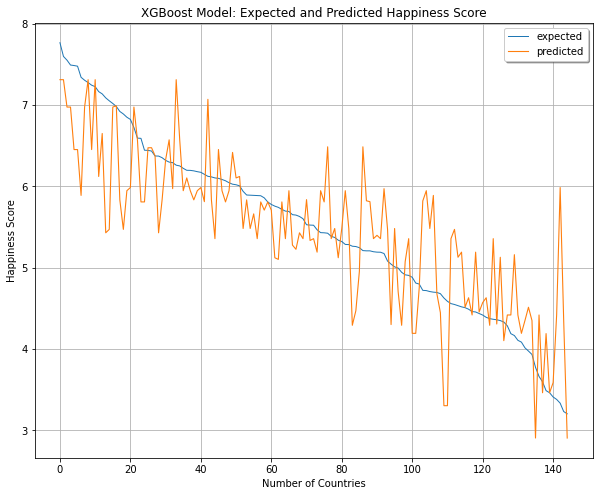

In [ ]:
x_ax = range(len(happiness_score_2019))
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(x_ax, happiness_score_2019, linewidth=1, label="expected")
plt.plot(x_ax, xgb_predict_score, linewidth=1.1, label="predicted")
plt.title("XGBoost Model: Expected and Predicted Happiness Score")
plt.xlabel('Number of Countries')
plt.ylabel('Happiness Score')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
# MAE (Mean Absolute Error)
xgb_mae = np.mean(happiness_score_2019 - xgb_predict_score) 
print("Mean Absolute Error for XGBoost: " + str(xgb_mae))

# MSE (Mean Squared Error)
xgb_mse = mean_squared_error(happiness_score_2019, xgb_predict_score)
print("Mean Squared Error for XGBoost: " + str(xgb_mse))

# RMSE (Root Mean Squared Error)
xgb_rmse = mean_squared_error(happiness_score_2019, xgb_predict_score, squared=False)
print("Root Mean Squared Error for XGBoost: " + str(xgb_rmse))

Mean Absolute Error for XGBoost: 0.030737931034482812
Mean Squared Error for XGBoost: 0.4198266827586208
Root Mean Squared Error for XGBoost: 0.6479403388882504


XGBoost Model performs the worst out of all the models.

### Actual Rankings

In [98]:
print("Actual Ranking\n-------------")
print(allData['2019'][['Country', 'Happiness Score', 'Happiness Rank']].head(20))

Actual Ranking
-------------
           Country  Happiness Score  Happiness Rank
0          Finland            7.769               1
1          Denmark            7.600               2
2           Norway            7.554               3
3          Iceland            7.494               4
4      Netherlands            7.488               5
5      Switzerland            7.480               6
6           Sweden            7.343               7
7      New Zealand            7.307               8
8           Canada            7.278               9
9          Austria            7.246              10
10       Australia            7.228              11
11      Costa Rica            7.167              12
12          Israel            7.139              13
13      Luxembourg            7.090              14
14  United Kingdom            7.054              15
15         Ireland            7.021              16
16         Germany            6.985              17
17         Belgium            6.923